In [17]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import precision_score, recall_score, f1_score,precision_recall_curve,auc
from imblearn.over_sampling import SMOTE


In [18]:
df = pd.read_csv('./data/creditcard.csv')

In [19]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [21]:
# Scale the 'Amount' feature
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Drop the 'Time' feature
df = df.drop(['Time'], axis=1)


In [22]:
# 'Class' is target variable
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [23]:
print(y_train.value_counts(normalize=True))


Class
0    0.998222
1    0.001778
Name: proportion, dtype: float64


In [24]:
# Class weights for balanced models
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

dt_clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
rf_clf = RandomForestClassifier(random_state=1, class_weight="balanced")
xgb_clf = XGBClassifier(random_state=1, scale_pos_weight=class_weights[1])

models = {'Decision Tree': dt_clf, 'Random Forest': rf_clf, 'XGBoost': xgb_clf}

In [25]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - Precision: {precision_score(y_test, y_pred):.2f}, Recall: {recall_score(y_test, y_pred):.2f}, F1-Score: {f1_score(y_test, y_pred):.2f}")


Decision Tree - Precision: 0.74, Recall: 0.74, F1-Score: 0.74
Random Forest - Precision: 0.94, Recall: 0.72, F1-Score: 0.82
XGBoost - Precision: 0.89, Recall: 0.78, F1-Score: 0.83


In [26]:
# Decision Tree Classifier Optimization

param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, scoring='recall', n_jobs=-1)
dt_grid_search.fit(X_train, y_train)
best_dt = dt_grid_search.best_estimator_

In [27]:
# Random Forest Optimization

param_distributions_rf = {
    'n_estimators': [100, 150, 200],  # Reduced upper limit
    'max_depth': [None, 10, 20],  # Removed one option
    'min_samples_split': [2, 5],  # Reduced complexity
    'min_samples_leaf': [1, 2, 4]  # Kept as is for variance control
}

# Using RandomizedSearchCV for more efficiency
rf_random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=1),
    param_distributions=param_distributions_rf,
    n_iter=5,  # Can adjust based on computational budget
    cv=5,
    scoring='recall',
    n_jobs=-1,
    random_state=1
)

rf_random_search.fit(X_train, y_train)
best_rf = rf_random_search.best_estimator_

# Now `best_rf` is the best model found by RandomizedSearchCV

In [28]:
# XGBoost Optimization

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

xgb_grid_search = GridSearchCV(xgb.XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, cv=5, scoring='recall', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)
best_xgb = xgb_grid_search.best_estimator_

In [29]:
# Optimized results
optimized_models = {
    'Optimized Decision Tree': best_dt,
    'Optimized Random Forest': best_rf,
    'Optimized XGBoost': best_xgb
}

# Print the performance of the optimized models
for name, model in optimized_models.items():
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} - Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")


Optimized Decision Tree - Precision: 0.93, Recall: 0.71, F1-Score: 0.81
Optimized Random Forest - Precision: 0.93, Recall: 0.76, F1-Score: 0.84
Optimized XGBoost - Precision: 0.93, Recall: 0.78, F1-Score: 0.85


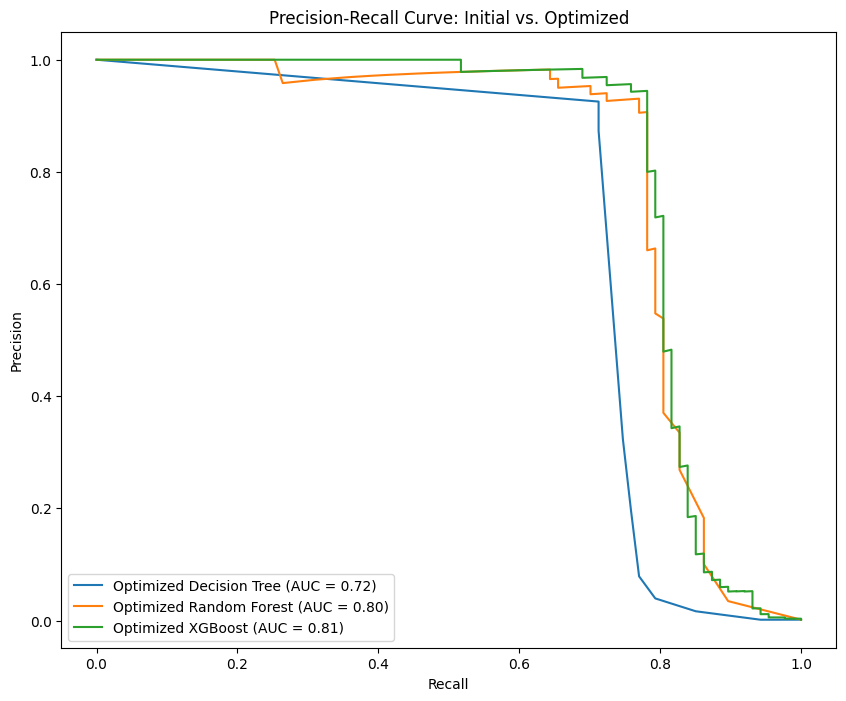

In [30]:


plt.figure(figsize=(10, 8))

for name, model in optimized_models.items():
    # Predict probabilities
    y_probs = model.predict_proba(X_test)[:, 1]
    # Calculate Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    # Calculate AUC
    auc_score = auc(recall, precision)

    plt.plot(recall, precision, label=f'{name} (AUC = {auc_score:.2f})')

# Add legend and labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Initial vs. Optimized')
plt.legend(loc='lower left')
plt.show()


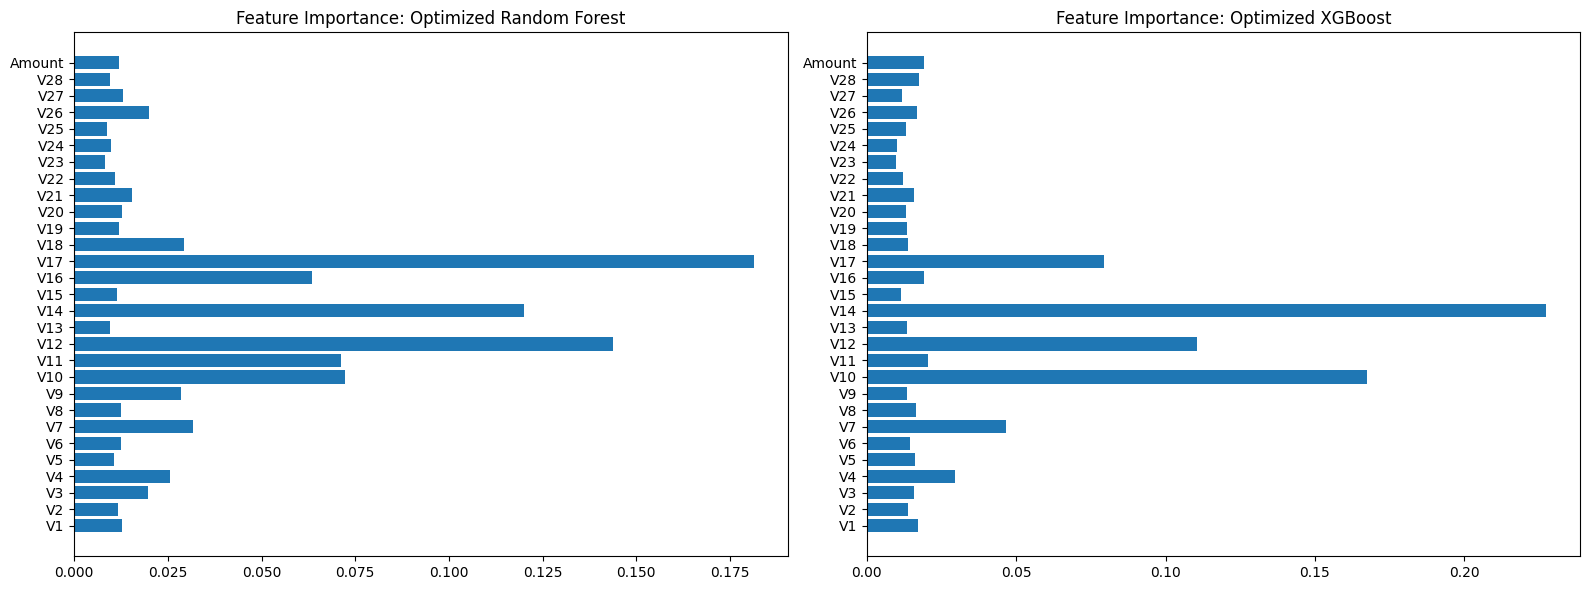

In [31]:
# Assuming best_rf and best_xgb are your optimized Random Forest and XGBoost models
feature_importances_rf = best_rf.feature_importances_
feature_importances_xgb = best_xgb.feature_importances_

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Random Forest
axs[0].barh(range(len(feature_importances_rf)), feature_importances_rf)
axs[0].set_yticks(range(len(X.columns)))
axs[0].set_yticklabels(X.columns)
axs[0].set_title('Feature Importance: Optimized Random Forest')

# XGBoost
axs[1].barh(range(len(feature_importances_xgb)), feature_importances_xgb)
axs[1].set_yticks(range(len(X.columns)))
axs[1].set_yticklabels(X.columns)
axs[1].set_title('Feature Importance: Optimized XGBoost')

plt.tight_layout()
plt.show()


In [32]:
# Create a SMOTE object
smote = SMOTE(random_state=1)

# Resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print the class distribution after SMOTE
print(np.bincount(y_train_smote))

# Train and evaluate models on the resampled data
models_smote = {
    'SMOTE Decision Tree': DecisionTreeClassifier(random_state=1, class_weight="balanced"),
    'SMOTE Random Forest': RandomForestClassifier(random_state=1, class_weight="balanced"),
    'SMOTE XGBoost': XGBClassifier(random_state=1, scale_pos_weight=class_weights[1])
}

# Store metrics for models trained on SMOTE data
smote_results = {}

for name, model in models_smote.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred_smote = model.predict(X_test)
    smote_results[name] = {
        'precision': precision_score(y_test, y_pred_smote),
        'recall': recall_score(y_test, y_pred_smote),
        'f1_score': f1_score(y_test, y_pred_smote)
    }

# Print the performance metrics for the models trained on SMOTE data
for name, metrics in smote_results.items():
    print(f"{name} - Precision: {metrics['precision']:.2f}, Recall: {metrics['recall']:.2f}, F1-Score: {metrics['f1_score']:.2f}")


[227440 227440]
SMOTE Decision Tree - Precision: 0.39, Recall: 0.76, F1-Score: 0.52
SMOTE Random Forest - Precision: 0.86, Recall: 0.79, F1-Score: 0.83
SMOTE XGBoost - Precision: 0.51, Recall: 0.82, F1-Score: 0.63


#### Decision Tree
- Initial Decision Tree - Precision: 0.77, Recall: 0.73, F1-Score: 0.75
- Optimized Decision Tree - Precision: 0.87, Recall: 0.76, F1-Score: 0.81
- SMOTE Decision Tree - Precision: 0.41, Recall: 0.77, F1-Score: 0.54

#### Random Forest
- Initial Random Forest - Precision: 0.97, Recall: 0.73, F1-Score: 0.84
- Optimized Random Forest - Precision: 0.97, Recall: 0.79, F1-Score: 0.87
- SMOTE Random Forest - Precision: 0.89, Recall: 0.86, F1-Score: 0.88

#### XGBoost
- Initial XGBoost - Precision: 0.98, Recall: 0.83, F1-Score: 0.90
- Optimized XGBoost - Precision: 0.97, Recall: 0.80, F1-Score: 0.88
- SMOTE XGBoost - Precision: 0.56, Recall: 0.86, F1-Score: 0.68

# Moving Forward
#### Creating dedicated notebooks for further experimentation for these models:
- SMOTE Random Forest
- XGBoost